In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

2025-06-11 00:49:43.943627: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-11 00:49:43.962327: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-11 00:49:44.370126: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-11 00:49:44.521951: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749602984.851893    3059 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749602984.92

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [5]:

X_train_full = X_train_full.reshape((60000, 28, 28, 1))
X_test =  X_test.reshape((10000, 28, 28, 1))

In [6]:
X_train_n = X_train_full / 255.
X_test_n =  X_test / 255.

In [8]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test =  X_test_n

In [9]:
np.random.seed(42)
tf.random.set_seed(42)

In [11]:
model = keras.models.Sequential([
    keras.layers.Input(shape=(28, 28, 1)),
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding='valid', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [13]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │     1,622,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,654,130 (6.31 MB)

 Trainable params: 1,654,130 (6.31 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

In [16]:
model_history = model.fit(X_train, y_train, epochs=30, batch_size=64 ,
validation_data=(X_valid, y_valid))

Epoch 1/30
860/860 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.6211 - loss: 1.2070 - val_accuracy: 0.7076 - val_loss: 0.7923
Epoch 2/30
860/860 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8003 - loss: 0.5505 - val_accuracy: 0.7906 - val_loss: 0.5815
Epoch 3/30
860/860 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.8271 - loss: 0.4800 - val_accuracy: 0.8168 - val_loss: 0.5128
Epoch 4/30
860/860 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.8427 - loss: 0.4398 - val_accuracy: 0.8306 - val_loss: 0.4727
Epoch 5/30
860/860 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.8519 - loss: 0.4116 - val_accuracy: 0.8474 - val_loss: 0.4365
Epoch 6/30
860/860 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.8606 - loss: 0.3889 - val_accuracy: 0.8532 - val_loss: 0.4124
Epoch 7/30
860/860 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.8673 - loss: 0.3702 - val_accuracy: 0.8574 - val_loss: 0.3956
Epoch 8/30
860/860 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.8730 - loss: 0.3548 - 

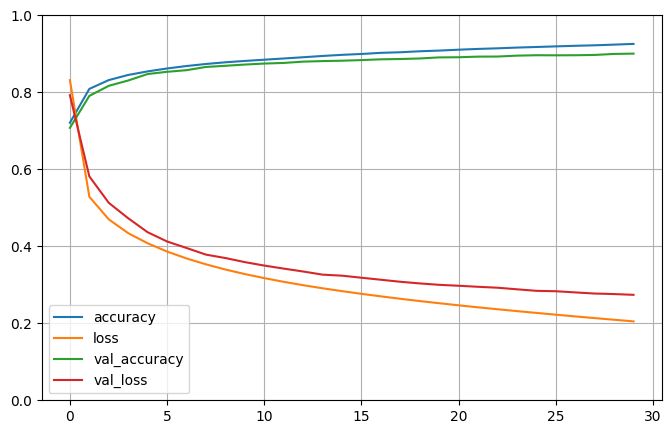

In [17]:
import pandas as pd 
pd.DataFrame (model_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [18]:
ev = model.evaluate(X_test_n, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8914 - loss: 0.3030


In [19]:
ev

[0.30036577582359314, 0.891700029373169]

In [36]:
X_new = X_test[4:40]


In [37]:
y_proba = model.predict(X_new)
y_pred = np.argmax(y_proba, axis=1)

y_pred

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


array([6, 1, 4, 6, 5, 7, 4, 5, 8, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 5, 1, 4,
       6, 6, 9, 4, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9])

In [38]:
y_test[4:40]

array([6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 9, 1, 4,
       6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9], dtype=uint8)

AxesImage(shape=(28, 28))


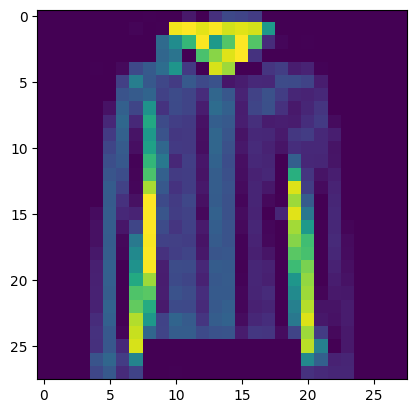

In [41]:
print(plt.imshow(X_test[6].reshape((28,28))))

In [42]:
keras.backend.clear_session

<function keras.src.backend.common.global_state.clear_session(free_memory=True)>

In [43]:
del model